# Effects of different loan characteristics on BorrowersAPR rate
## by Ting Yang

## Investigation Overview

> In this presentation, I will be presenting the study on different variables that could impact on the borrowers' APR rate in Prosper loan company. The main focus will be on Borrowers APR rate, ProsperRate, ProsperScore, the loan amount and term. The monthly income and borrowers occupations are also briefly studied.

## Dataset Overview

> The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. This project investigates the factors that could effect borrowers' APR rate and the amount of money they can borrow.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('ProsperLoanData.csv')
df_loan = df_loan[~df_loan.BorrowerAPR.isna()]

#Create a subset with variables that we think are relavant

cols = ['LoanOriginalAmount', 'ProsperScore', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'Occupation','DelinquenciesLast7Years','AvailableBankcardCredit', 'CreditScoreRangeUpper']
df2_loan = df_loan[cols]
df2_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanOriginalAmount       113912 non-null  int64  
 1   ProsperScore             84853 non-null   float64
 2   BorrowerAPR              113912 non-null  float64
 3   StatedMonthlyIncome      113912 non-null  float64
 4   Term                     113912 non-null  int64  
 5   ProsperRating (Alpha)    84853 non-null   object 
 6   EmploymentStatus         111682 non-null  object 
 7   Occupation               110349 non-null  object 
 8   DelinquenciesLast7Years  112947 non-null  float64
 9   AvailableBankcardCredit  106393 non-null  float64
 10  CreditScoreRangeUpper    113346 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 10.4+ MB


## Distribution of BorrowersAPR

> The distribution of Borrower APR looks fairly normally distributed, however it is noticed that a very large peak appeared around 0.35.

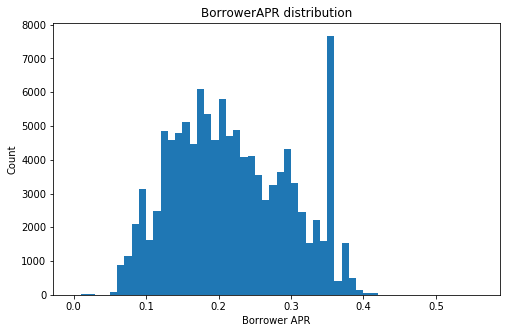

In [10]:
bins = np.arange(0, df2_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df2_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('BorrowerAPR distribution');

## Distribution of Borrowers monthly income

> The distribution of stated monthly income is very right skewed, with most of the monthly income is less than 20k.

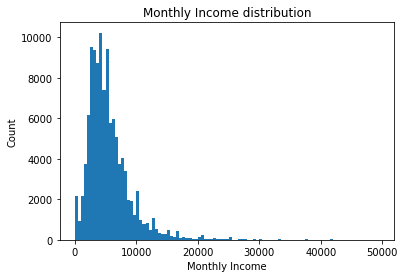

In [8]:
# Distribution of stated monthly income
bins = np.arange(0, 50000, 500)
plt.hist(data = df2_loan, x = 'StatedMonthlyIncome', bins=bins)
plt.ylabel('Count')
plt.xlabel('Monthly Income')
plt.title('Monthly Income distribution');

## Relationship between BorrowerAPR and ProsperScore.

> The higher ProsperScore leads to the lower APR rate, as those people tend to have a better credit rating.

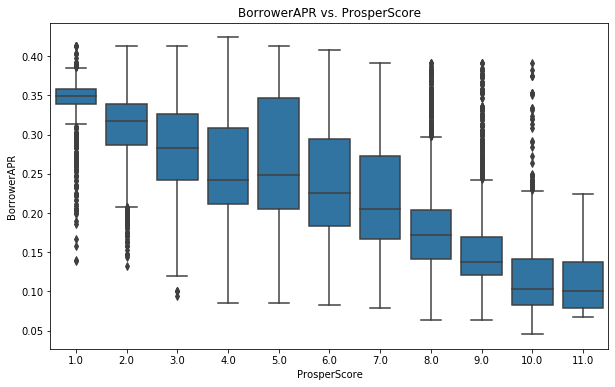

In [9]:
plt.figure(figsize=[10,6])
sb.boxplot(x="ProsperScore", y="BorrowerAPR", data=df2_loan, color = sb.color_palette()[0])
plt.title('BorrowerAPR vs. ProsperScore');

## ProsperRating on the relationship between BorrowerAPR and ProsperScore.

> The relationships between BorrowerAPR and ProsperScore on different ProsperRatings is interesting that some have negative impact and some have postive relationships, borrowers who have rating HR, E, D and C have postive relationship to the APR and ProsperScore, whereas borrowers with better ratings (B, A, AA) have a negative impact on the APR and ProsperScore. 

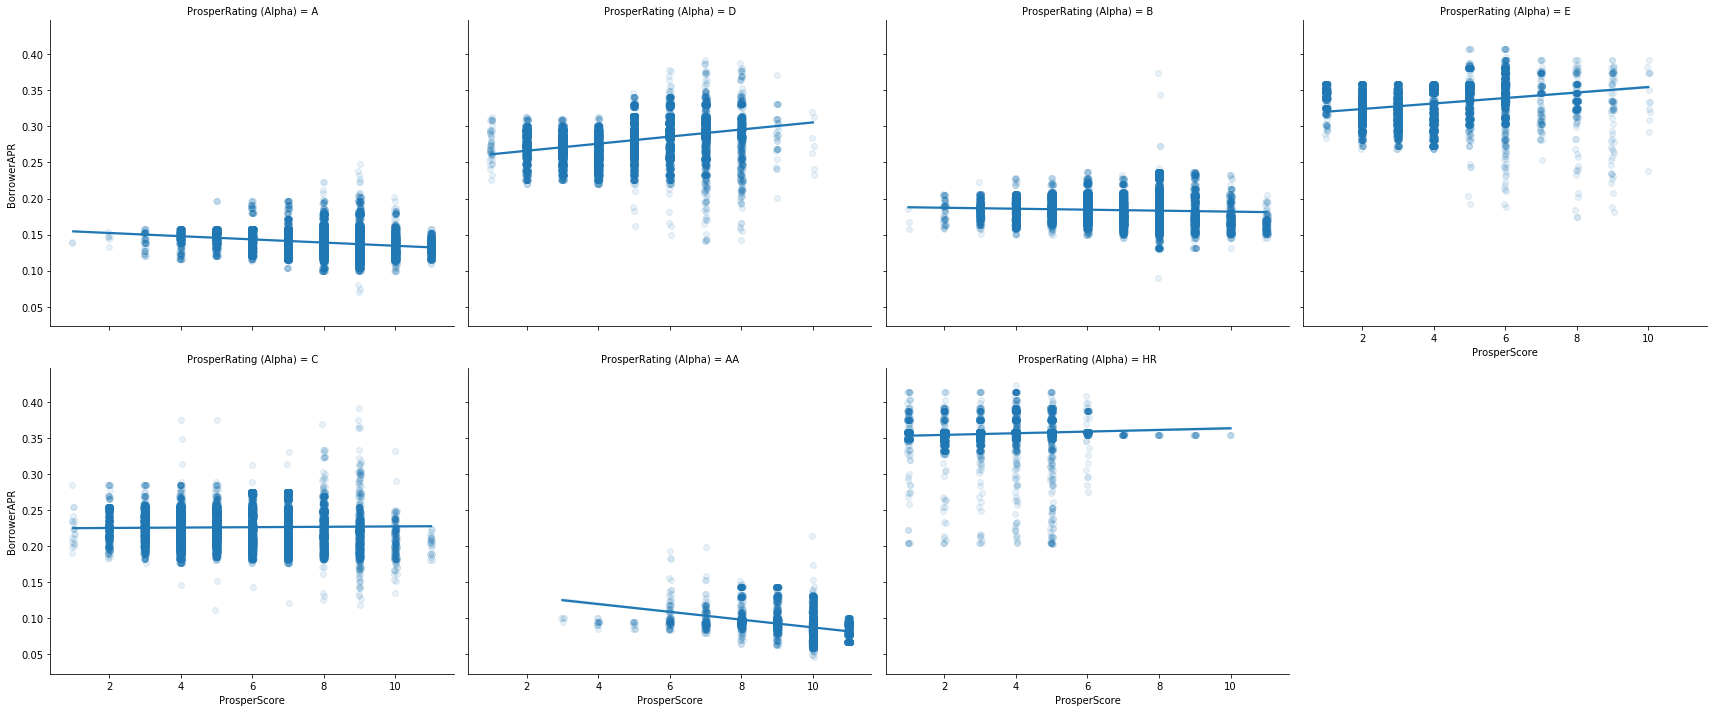

In [6]:
g=sb.FacetGrid(data=df2_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'ProsperScore', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

## Impact of loan term to the relationship between LoanOriginalAmount and ProsperRating.

> The loan amount increases with the better rating across all three different loan terms.

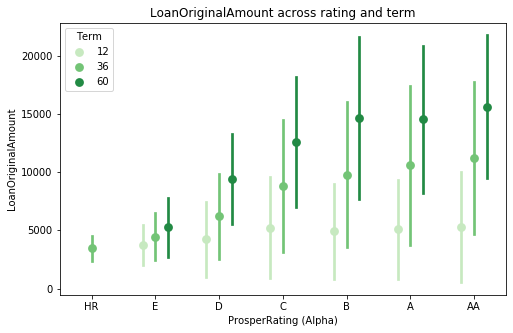

In [7]:
#first order prosper rating from HR to AA according to description
ProsperRate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ProsperRate_order)
df2_loan['ProsperRating (Alpha)'] = df2_loan['ProsperRating (Alpha)'].astype(ordered_var)

#point plot
fig = plt.figure(figsize=[8,5])
ax = sb.pointplot(data = df2_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('LoanOriginalAmount across ProsperRating and term')
plt.ylabel('LoanOriginalAmount')
ax.set_yticklabels([],minor = True);